In [3]:
from sqlalchemy import *
from sqlalchemy.sql import *

engine = create_engine('sqlite:///Data/Chinook_Sqlite.sqlite')
metadata = MetaData()
metadata.reflect(bind=engine)
conn=engine.connect()

InvoiceLine=Table("InvoiceLine", metadata, autoload=True, autoload_with="engine")
MediaType=Table("MediaType", metadata, autoload=True, autoload_with="engine")
Track=Table("Track", metadata, autoload=True, autoload_with="engine")
Invoice=Table("Invoice", metadata, autoload=True, autoload_with="engine")
Customer=Table("Customer", metadata, autoload=True, autoload_with="engine")

import pandas as pd
df=pd.read_csv('./Data/imdb.csv')

### Агрегирование и групповые функции языка SQL. Функции COUNT(), SUM(), AVG(), MAX(). MIN(). Влияние NULL-значений на результат действия функций COUNT и AVG.

Общая запись агрегирующих функций:

<Функция>([DISTINCT]<выражение>)

В языке SQL используются следующие агрегирующие функции:

SUM([DISTINCT] <выражение>)

Выводит в итоговой таблице сумму значений для выражения по полям выборки. Выражение должно возвращать числовое значение.

AVG([DISTINCT] <выражение>)

Среднее значение для выражения. Выражение должно возвращать числовое значение.

COUNT([DISTINCT] <выражение> |*)

Подсчитывает число записей, в который выражение не имеет значение Null (поля имеют значение Null, когда никакое значение для них не задано). Выражение может возвращать произвольное значение.

При используемом формате функции COUNT(*) возвращает общее количество записей в БД слоя.

MAX( <выражение>)

Возвращает максимальное значение выражения для выборки.

MIN(<выражение>)

Возвращает минимальное значение выражения из выборки.

лияние NULL-значений в функции count

Если аргумент функции COUNT является константой или столбцом без пустых значений, то функция возвращает количество строк, к которым применимо определенное условие или группирование.

Если аргументом функции является столбец, содержащий пустое значение, то COUNTвернет число строк, не содержащих пустые значения, и к которым применимо определенное условие или группирование.

Поведение функции COUNT(*)не зависит от пустых значений. Она возвратит общее количество строк в таблице.

Влияние NULL-значений в функции avg

Если некоторые элементы пусты, то есть их значения неизвестны или не существуют, то деление на количество всех элементов множества приведет к неправильному результату.

Функция AVG вычисляет среднее значение всех известных значений множества элементов, то есть эта функция подсчитывает сумму известных значений и делит ее на количество этих значений, а не на общее количество значений, среди которых могут быть NULL-значения. Если столбец состоит только из пустых значений, то функция AVGтакже возвратит NULL.


### С помощью библиотеки SQLAlchemy создайте объекты таблиц базы данных Chinook. В таблице MediaType базы данных Chinook содержатся данные о типах файлов (файл MPEG, AAC и т.д.). В таблице InvoiceLine содержатся данные о покупках. Напишите запрос, показывающий, сколько звуковых дорожек куплено в формате "Protected MPEG-4 video file" файл

In [4]:
MT = MediaType.alias('MT')
IL = InvoiceLine.alias('IL')
T = Track.alias('T')
s = select(func.count(IL.c.UnitPrice)).where(and_(
     MT.c.Name == 'Protected MPEG-4 video file', 
     T.c.TrackId == IL.c.TrackId, 
     MT.c.MediaTypeId == T.c.MediaTypeId))

result=conn.execute(s).fetchall()
result

[(111,)]

### Записи набора данных imdb.csv содержат информацию о фильмах. Атрибут Genre каждой записи содержит перечень жанров конкретного фильма. Постройте столбчатую диаграмму числа фильмов в жанрах Animation, Family, Biography.

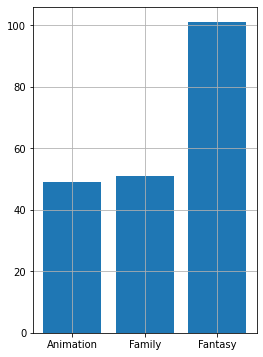

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
genres = ['Animation', 'Family', 'Fantasy']
data = {i:len(df[df['Genre'].str.contains(i)]) for i in genres}

fig, ax = plt.subplots(figsize = (4, 6))
ax.bar(data.keys(), data.values())
ax.grid()
